In [50]:
import h5py as h5
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import networkx as nx
from scipy.stats.stats import pearsonr

In [25]:
#constants
order = 2500
N = 5*order
Ne = 4*order
n_rank = 160
sim_steps = np.arange(75000., 760000., 75000.)

In [3]:
def gather(label,it_range,form):
    array = np.array([])
    for it in it_range:
        array = np.hstack((array,np.load(label+"_"+str(it)+"."+form)))
    return array

In [4]:
connectivities = []
all_cons = []

In [5]:
def get_exc_conn(sources, targets, Ne = Ne):
    conn_matt_exc = np.zeros((Ne, Ne))
    for idx, neuron in enumerate(sources):
        conn_matt_exc[int(neuron)-1][int(targets[idx])-1] += 1
    return np.mean(conn_matt_exc)

In [6]:
for step in range(len(sim_steps)):
    sources = gather("data/sources_" + str(sim_steps[step]), np.arange(n_rank), 'npy')
    targets = gather("data/targets_" + str(sim_steps[step]), np.arange(n_rank), 'npy')
    connectivities.append(get_exc_conn(sources, targets, Ne))

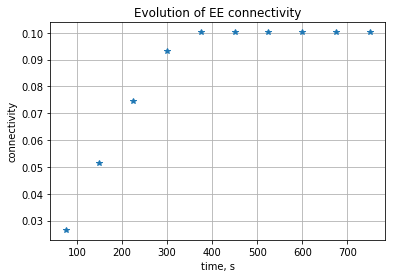

In [7]:
#evolution of EE connectivity
fig01 = plt.figure()
plt.plot((sim_steps/1000).astype(int), connectivities, '*')
plt.grid('on')
plt.xlabel('time, s')
plt.ylabel('connectivity')
plt.title('Evolution of EE connectivity')
#plt.savefig('connect.pdf', dpi = 300)
plt.show()

In [8]:
#NUMBER OF SYNAPSES 
def get_conn_matt(sources, targets, Ne = Ne):
    conn_matt_exc = np.zeros((Ne, Ne))
    for idx, neuron in enumerate(sources):
        conn_matt_exc[int(neuron)-1][int(targets[idx])-1] += 1
    return conn_matt_exc
sources = gather("data/sources_" + str(sim_steps[-1]), np.arange(n_rank), 'npy')
targets = gather("data/targets_" + str(sim_steps[-1]), np.arange(n_rank), 'npy')
conn_matrix = get_conn_matt(sources, targets, Ne)

In [9]:
uniq, count = np.unique(conn_matrix, return_counts = True)
freq_synapses = zip(uniq, count)
counts_norm = count/float(conn_matrix.size)
#pois5 = coup[0:6]/float(conn_matrix_750_5.size)
s = np.random.poisson(np.mean(conn_matrix), 100000000-10000)
unip, coup = np.unique(s, return_counts = True)
pois = coup[0:6]/float(conn_matrix.size)

C:\Users\mkapi\Anaconda2\envs\dataanalysis\lib\site-packages\matplotlib\scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


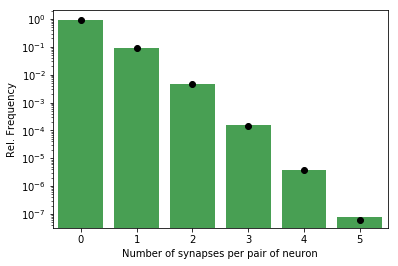

In [10]:
plt.semilogy(uniq.astype(int), pois, 'o', color = 'black')
ax1 = sns.barplot(x =  uniq.astype(int), y = counts_norm, color=sns.xkcd_rgb["medium green"], log = True)
ax1.set_ylabel("Rel. Frequency")
ax1.set_xlabel("Number of synapses per pair of neuron")
figure = ax1.get_figure()    
#figure.savefig('synnum.pdf', dpi=400)

In [11]:
#BIDIRECTIONAL 
#Data_loading
graph_data = zip(sources, targets)

#creating multigraph
G_750 = nx.MultiDiGraph()
G_750.add_edges_from(graph_data)

#finding amount of bidirectional connections:
def bidirectional(graph):
    bidi = 0
    for (u,v) in graph.edges():
        #print "current edge: ", (u,v)
        if u in graph[v]:
            #print "u: ", u
            #print "in g[v]", g[v]
            bidi +=1
    return bidi/2
    
bid_750 = bidirectional(G_750) 
fraction_bid = bid_750/float(len(sources)) 
print ('fraction of bidirectional connections: ', fraction_bid)

fraction of bidirectional connections:  0.047718373197773806


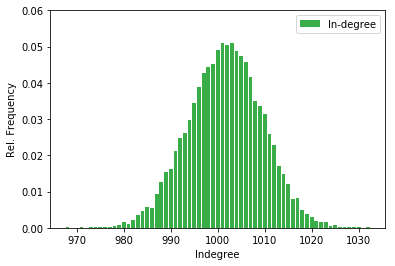

In [12]:
#IN- OUTDEGREE
#indegree distribution
in_degrees_750 = G_750.in_degree()

invalues = []
for item in range(1, 10001):
    invalues.append(in_degrees_750[item])
invalues = np.asarray(invalues)
inval8, countsinval8 = np.unique(invalues, return_counts = True)
countsinval8 = countsinval8/float(Ne)
plt.figure()
plt.bar(inval8, countsinval8, color = sns.xkcd_rgb["medium green"])
plt.legend(['In-degree'])
plt.ylabel('Rel. Frequency')
plt.ylim([0, 0.06])
plt.xlabel('Indegree')
#plt.savefig('in8ver1.png')
plt.show()

In [13]:
print('indegree mean', np.mean(invalues))
print('indegree variance', np.var(invalues))

indegree mean 1001.6362
indegree variance 61.51924956


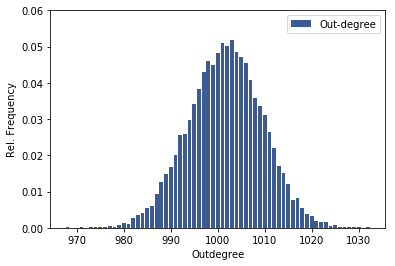

In [14]:
#outdegree distribution
out_degrees_750 = G_750.out_degree()
outvalues = []
for item in range(1, 10001):
    outvalues.append(out_degrees_750[item])
outvalues = np.asarray(outvalues)
outval8, countsoutval8 = np.unique(outvalues, return_counts = True)
countsoutval8 = countsoutval8/float(Ne)
plt.figure()
plt.bar(outval8, countsoutval8, color = sns.xkcd_rgb["denim blue"])
plt.legend(['Out-degree'])
plt.ylabel('Rel. Frequency')
plt.ylim([0, 0.06])
plt.xlabel('Outdegree')
#plt.savefig('out8ver1.png', dpi = 400)
plt.show()

In [15]:
print('outdegree mean', np.mean(outvalues))
print('outdegree variance', np.var(outvalues))

outdegree mean 1001.6362
outdegree variance 61.60724956


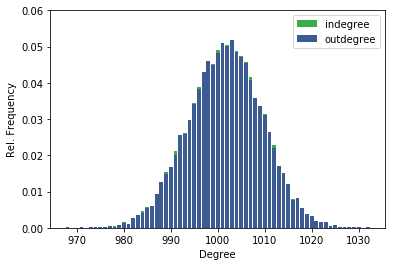

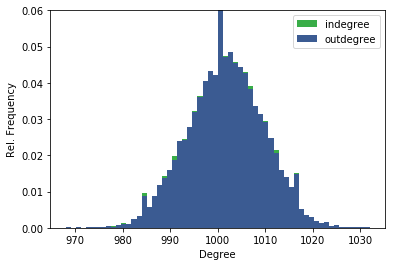

In [19]:
#both
plt.figure()
plt.bar(inval8, countsinval8, color = sns.xkcd_rgb["medium green"])
plt.bar(outval8, countsoutval8, color = sns.xkcd_rgb["denim blue"])
plt.legend(['indegree', 'outdegree'])
plt.ylabel('Rel. Frequency')
plt.ylim([0, 0.06])
plt.xlabel('Degree')
#plt.savefig('both8ver1.png', dpi = 400)
plt.show()
plt.figure()
plt.hist(invalues, 60, normed = 1, color = sns.xkcd_rgb["medium green"])
plt.hist(outvalues, 60, normed = 1, color = sns.xkcd_rgb["denim blue"])
plt.legend(['indegree', 'outdegree'])
plt.ylabel('Rel. Frequency')
plt.ylim([0, 0.06])
plt.xlabel('Degree')
#plt.savefig('both8ver2.png', dpi = 400)
plt.show()

In [26]:
#ACTIVITY OF NEURONS AFTER SIMULATION
times = gather("data/times_" + str(sim_steps[-1]), np.arange(n_rank), 'npy')
senders = gather("data/senders_" + str(sim_steps[-1]), np.arange(n_rank), 'npy')

In [35]:
#cutting last 2 seconds of simulations
times_last = times[np.where(times > (sim_steps[-1] - 2000.))]
senders_last = senders[np.where(times > (sim_steps[-1] - 2000.))]

In [36]:
#separating excitatory and inhibitory trains
inhib_last = senders_last[np.where(senders_last>Ne)]
inhib_last_times = times_last[np.where(senders_last>Ne)]
inhib_train = zip(inhib_last_times, inhib_last)
                             
exc_last = senders_last[np.where(senders_last<=Ne)]
exc_last_times = times_last[np.where(senders_last<=Ne)]
exc_train = zip(exc_last_times, exc_last)

In [37]:
#chosing random samples
inhib_train_rand_idx = np.random.choice(range(len(inhib_last)), 500) 
exc_train_rand_idx = np.random.choice(range(len(exc_last)), 2000)

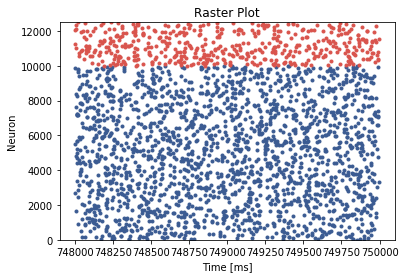

In [39]:
#raster plot
fig01 = plt.figure()
plt.plot(exc_last_times[exc_train_rand_idx], exc_last[exc_train_rand_idx], '.', color = sns.xkcd_rgb["denim blue"])
plt.plot(inhib_last_times[inhib_train_rand_idx], inhib_last[inhib_train_rand_idx], '.', color = sns.xkcd_rgb["pale red"])
plt.ylim([0, 12500])
plt.ylabel('Neuron')
plt.xlabel('Time [ms]')
plt.title('Raster Plot')
#plt.savefig('raster_plot_02_twice.png', dpi = 300)   
plt.show() 

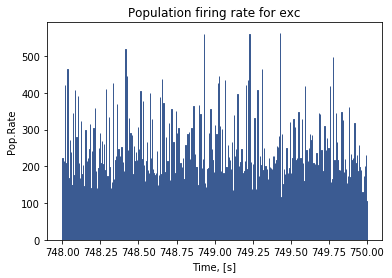

In [41]:
#hist
fig02 = plt.figure()
plt.hist(exc_last_times/1000., 1000, fc = sns.xkcd_rgb["denim blue"], ec = sns.xkcd_rgb["denim blue"])
plt.title('Population firing rate for exc')
plt.ylabel('Pop.Rate')
plt.xlabel('Time, [s]')
#plt.savefig('pop_hist_01.png', dpi = 300)
plt.show()   

In [42]:
#firing rate

#cutting last 10s of simulations 

times_last_10s = times[np.where(times >= (sim_steps[-1] - 10000.))]
senders_last_10s = senders[np.where(times >= (sim_steps[-1] - 10000.))]
 
#chosing only excitatory population
exc_last_10s = senders_last_10s[np.where(senders_last_10s <= Ne)]
exc_time_10s = times_last_10s[np.where(senders_last_10s <= Ne)]

times_all_exc= []
firing_rates_exc_all = np.zeros(Ne)
for neuron_id in range(1, Ne+1 ):
    times_all_exc.append(exc_time_10s[np.where(exc_last_10s == neuron_id)])
    firing_rates_exc_all[neuron_id-1] = len(np.where(exc_last_10s == neuron_id)[0])/10.

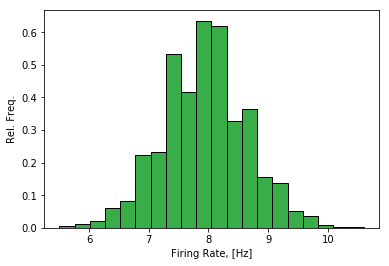

In [46]:
fig03 = plt.figure()
#ax = plt.gca()       
#ax.yaxis.set_major_formatter(mtick.FuncFormatter(norm_y))
plt.hist(firing_rates_exc_all, 20, fc = sns.xkcd_rgb["medium green"], ec = 'black', normed = True)
#plt.xlim([2, 8])
plt.ylabel('Rel. Freq.')
plt.xlabel('Firing Rate, [Hz]')
#plt.savefig('fr20n_01.png', dpi = 300)
plt.show()

In [47]:
#2D Irregularity
ISI = []
ISI_mean = []
ISI_std = []
CV = []
for neuron in range(1, Ne+1):
    ISI.append(np.diff(times_all_exc[neuron-1]))
    ISI_mean.append(np.mean(np.diff(times_all_exc[neuron-1])))
    ISI_std.append(np.std(np.diff(times_all_exc[neuron-1])))  
    CV.append(np.std(np.diff(times_all_exc[neuron-1]))/np.mean(np.diff(times_all_exc[neuron-1])))

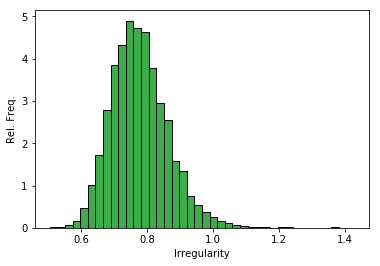

In [48]:
#plotting
fig04 = plt.figure()
#ax = plt.gca()       
#ax.yaxis.set_major_formatter(mtick.FuncFormatter(norm_y))
plt.hist(CV, 40, fc = sns.xkcd_rgb["medium green"], ec = 'black', normed = True)
plt.ylabel('Rel. Freq.')
plt.xlabel('Irregularity')
#plt.savefig('ir40_01.png', dpi = 300)
plt.show()

In [51]:
#PAIRWISE
spike_trains = np.asarray(times_all_exc)
#np.around(spike_trains[0]).astype(int)

time_bin = 10.
timescale = np.arange(740000, 750000, 1) 
#timescale = np.arange(749000, 750000, 1) 
#timescale_whole = np.zeros(10000)

time_series = []  #to store spike trains
spike_trains_int = np.zeros_like(spike_trains)
for neuron in range(len(spike_trains)):
    timescale_whole = np.zeros(10000)
    spike_trains_int[neuron] = np.around(spike_trains[neuron]).astype(int)
    for i in range(len(spike_trains_int[neuron])):
        idx_count = np.where(timescale == spike_trains_int[neuron][i])
        timescale_whole[idx_count] = 1
    time_series.append(timescale_whole)

spike_count_values = np.asarray(time_series)

#reshaping to get 1000 chunks 10ms each
reshaped_counts = []
for neuron in range(len(spike_count_values)):
    reshaped_train = spike_count_values[neuron].reshape((1000, 10))
    reshaped_counts.append(reshaped_train)
reshaped_bin_spikes = np.asarray(reshaped_counts) #shape is 10000 neurons*1000 (number of bins)*10 ms 

#counting spikes in those bins
count_ap_exc = []

#looping over neurons
for neuron in range(Ne):
    count_ap_sing = [] #array for storing counts for each chunk for particular neuron 
    #looping over data chunks
    for item in range(1000):
        count_ap_sing.append(np.sum(reshaped_bin_spikes[neuron][item]))
    count_ap_exc.append(count_ap_sing)

counts_exc_bins = np.asarray(count_ap_exc) #shape Ne neurons * 1000 chunks [spike count in 10 ms]


#calculating variance 
variances = np.var(counts_exc_bins, axis = 1) 

#r,p = pearsonr(x,y)
#r,p = pearsonr(counts_exc_bins[0], counts_exc_bins[1])
matrix_corr = []

for i in range(Ne):
    corr_neur = []
    for j in range(Ne):
        r, p = pearsonr(counts_exc_bins[i], counts_exc_bins[j])
        corr_neur.append(r)
    matrix_corr.append(corr_neur)

matrix_corr_01 = np.asarray(matrix_corr)
np.save('corr01.npy', matrix_corr_01)

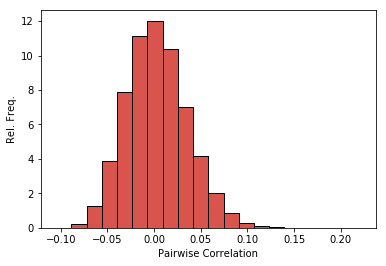

In [52]:
corr_mat = np.load('corr01.npy')

corr_flat = np.ndarray.flatten(corr_mat)

#removing ones
idx_ones = np.where(corr_flat == 1)
corr_s = np.delete(corr_flat, idx_ones)

'''
def norm_y(x, *args):
    """
    f-n for y-axis ticks 
    """
    x = float(x)/10000
    return "{:.2f}".format(x) 
'''
fig06 = plt.figure()
#ax = plt.gca()       
#ax.yaxis.set_major_formatter(mtick.FuncFormatter(norm_y))
plt.hist(corr_s, 20, fc=sns.xkcd_rgb["pale red"], ec= 'black', normed = True)
plt.ylabel('Rel. Freq.')
plt.xlabel('Pairwise Correlation')
#plt.savefig('correlation.png', dpi = 400)
plt.show()